# G2M insight for Cab Investment firm

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read files**

In [2]:
cab_data = pd.read_csv('data/Cab_Data.csv')
customer_id = pd.read_csv('data/Customer_ID.csv')
transaction_id = pd.read_csv('data/Transaction_ID.csv')
city = pd.read_csv('data/City.csv')

**Data Inspection**

**1) `cab_data`: Details of transaction for 2 cab companies**

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [5]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
cab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [7]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
cab_data.duplicated().sum()

0

**2)`customer_id`: A unique identifier which links the customer’s demographic details**

In [9]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
customer_id.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


In [12]:
customer_id.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [13]:
customer_id.duplicated().sum()

0

**3)`transaction_id`: Transaction to customer mapping and payment mode**

In [14]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [15]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [16]:
transaction_id.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,1.022006e+07,127045.493722,10000011.0,10110035.25,10220059.5,10330083.75,10440108.0
Customer ID,440098.0,2.361951e+04,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


In [17]:
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [18]:
transaction_id.duplicated().sum()

0

**4)`city`: US cities, their population and number of cab users**

In [19]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [20]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [21]:
city.describe().T

,count,unique,top,freq
City,20,20,NEW YORK NY,1
Population,20,20,"8,405,837",1
Users,20,20,"302,149",1


In [22]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [23]:
city.duplicated().sum()

0

**Data Preparation**

- merge datasets and make it into `df`
- noticed that in `cab_data`, `Date of Travel` is represented in numerical value such as 42377,42375, which here it needs to convert to interpretable date
- noticed that in `cab_data`, values such as `ORANGE COUNTY` and `SILICON VALLEY` in column `City` doesn't have a state abbreviations, which it needs to update infomation, and covert into two columns `City` and `State` for a better undertsanding
- noticed that data of `city` contains columns `Population` and `Users`, but they are in data types of object. For a better manipualtions, convert them into numerical representations
- seperate two dataset specific for two cab companies `yello cab` and `pink cab` 

In [24]:
df = cab_data.merge(transaction_id, on= 'Transaction ID').merge(customer_id, on ='Customer ID').merge(city, on = 'City')

In [25]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], origin = '1899-12-30', unit ='D')

In [26]:
df.replace({'ORANGE COUNTY':'ORANGE COUNTY CA', 'SILICON VALLEY':'SILICON VALLEY CA'}, inplace = True)

In [27]:
df[['City', 'State']] = df['City'].str.extract(r'([A-Za-z\s]+)\s([A-Za-z]{2})')

In [28]:
df['Month'] = df['Date of Travel'].dt.month
df['Year'] = df['Date of Travel'].dt.year

In [29]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,State,Month,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",GA,1,2016
1,10351127,2018-07-21,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",GA,7,2018
2,10412921,2018-11-23,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",GA,11,2018
3,10000012,2016-01-06,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",GA,1,2016
4,10320494,2018-04-21,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",GA,4,2018


In [30]:
yellow_cab = df[df['Company'] == 'Yellow Cab']
pink_cab = df[df['Company'] == 'Pink Cab']

In [31]:
yellow_cab.shape

(274681, 17)

In [32]:
pink_cab.shape

(84711, 17)

**EDA & Hypothesis**

**Is there any seasonality in number of customers using the cab service?**

In [33]:
sns.set_theme()

In [34]:
transaction_count0 = yellow_cab.groupby('Month')['Transaction ID'].count()
transaction_count1 = pink_cab.groupby('Month')['Transaction ID'].count()

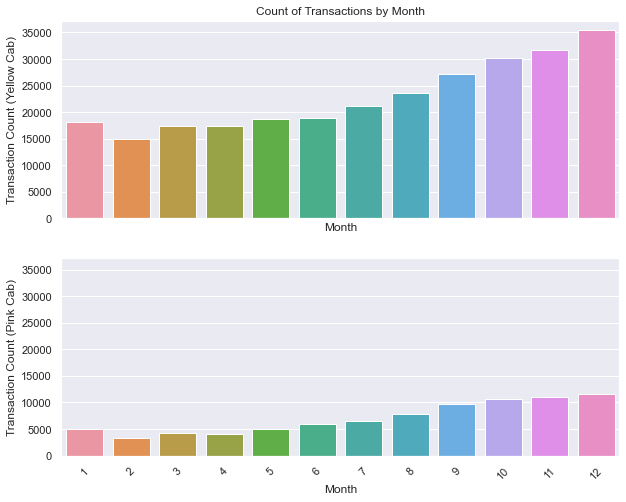

In [35]:
fig, axes = plt.subplots(nrows=2, sharex=True, sharey=True, figsize = (10,8))

# Creating the bar plots using seaborn
sns.barplot(x=transaction_count0.index, y=transaction_count0.values, ax=axes[0])
sns.barplot(x=transaction_count1.index, y=transaction_count1.values, ax=axes[1])

# Adding labels and title to the plots
axes[0].set_ylabel('Transaction Count (Yellow Cab)')
axes[1].set_ylabel('Transaction Count (Pink Cab)')
axes[1].set_xlabel('Month')
axes[0].set_title('Count of Transactions by Month')

# Rotating x-axis labels if needed
plt.xticks(rotation=45)

# Displaying the plots
plt.show()

**Which cab company have greater profit in their service?**

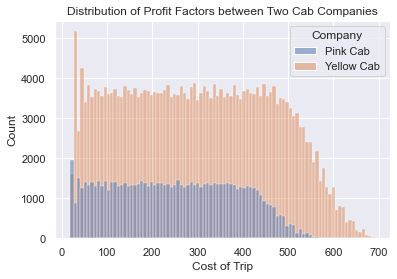

In [36]:
sns.histplot(df, x='Cost of Trip', hue = 'Company')
plt.title('Distribution of Profit Factors between Two Cab Companies')
plt.show()

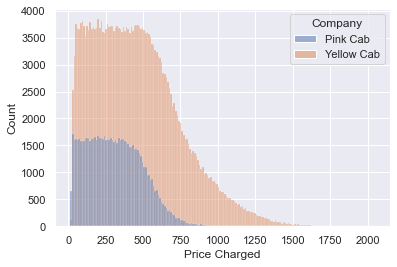

In [37]:
sns.histplot(df, x='Price Charged', hue = 'Company')
plt.show()

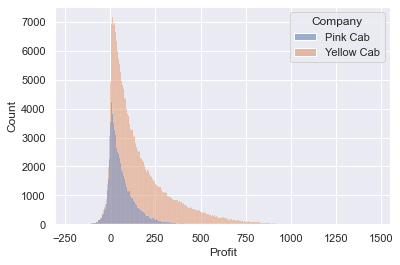

In [38]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
sns.histplot(df, x='Profit', hue = 'Company')
plt.show()

**What are the demographic distriutions for both cab companies?**

In [39]:
transaction_count2 = yellow_cab.groupby('City')['Transaction ID'].count()
transaction_count3 = pink_cab.groupby('City')['Transaction ID'].count()

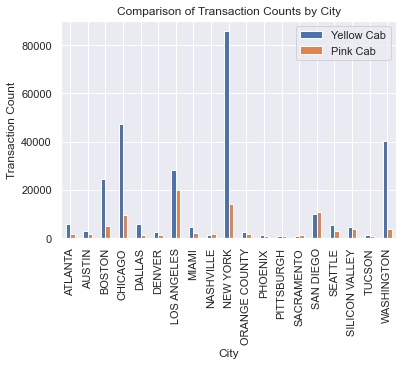

In [40]:
combined_transaction_counts = pd.concat([transaction_count2, transaction_count3], axis=1)
combined_transaction_counts.columns = ['Yellow Cab', 'Pink Cab']

combined_transaction_counts.plot(kind='bar')

plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.title('Comparison of Transaction Counts by City')

plt.legend()

plt.show()

**Which cab company have a constantly increasing customers in years?**

In [41]:
transaction_count4 = yellow_cab.groupby('Year')['Transaction ID'].count()
transaction_count5 = pink_cab.groupby('Year')['Transaction ID'].count()
transaction_count4 = transaction_count4.reset_index()
transaction_count5 = transaction_count5.reset_index()

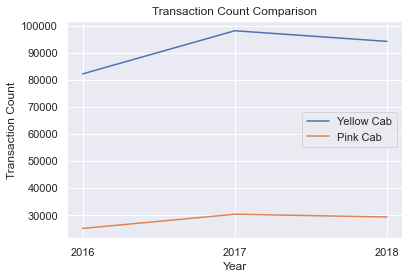

In [42]:
# Plotting the line plots
sns.lineplot(data=transaction_count4, x='Year', y='Transaction ID', label='Yellow Cab')
sns.lineplot(data=transaction_count5, x='Year', y='Transaction ID', label='Pink Cab')

# Add labels and title to the plot
plt.xticks([2016, 2017, 2018])
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.title('Transaction Count Comparison')

# Display the plot
plt.legend()
plt.show()

**Which cab company most likely to keep their customers?**

In [43]:
condition = df['Customer ID'].isin(df['Customer ID'].value_counts()[df['Customer ID'].value_counts() == 1].index)
filtered_df = df[['Customer ID', 'Company']][condition]

In [44]:
churn = filtered_df.groupby('Company')
customer_counts = churn['Customer ID'].nunique()

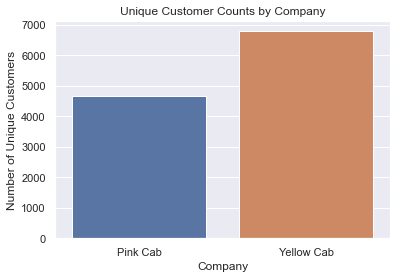

In [45]:
customer_counts = customer_counts.reset_index()

sns.barplot(data=customer_counts, x='Company', y='Customer ID')

plt.xlabel('Company')
plt.ylabel('Number of Unique Customers')
plt.title('Unique Customer Counts by Company')

plt.show()

In [46]:
customer1 = df.groupby('Company')['Customer ID'].apply(lambda x: x.unique().size)

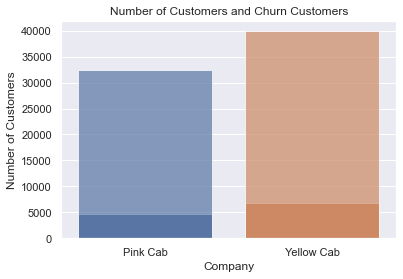

In [47]:
sns.barplot(data=customer_counts, x='Company', y='Customer ID')
sns.barplot(data=customer1.reset_index(), x='Company', y='Customer ID', alpha=0.7, label='Total Unique Customers')
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.title('Number of Customers and Churn Customers')

plt.show()
